Gerekli Kütüphanelerin İçe Aktarılması
- `pandas`: Veri manipülasyonu ve Excel dosyasının okunması için kullanılır.
- `seaborn` ve `matplotlib.pyplot`: Görselleştirme (grafikler) için kullanılır.
- `KMeans` ve `StandardScaler`: `sklearn`'den, kümeleme ve verinin ölçeklendirilmesi için kullanılır.

`fiat_cars_cleaned.xlsx` dosyası, ilk sütun indeks olarak belirlenip, `data` veri çerçevesine yüklenir.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_excel("./fiat_cars_cleaned.xlsx", index_col=0)

Fiyatları, ortalama 0 ve standart sapma 1 olacak şekilde ölçeklendiriyoruz. Ardından, 3 küme olacak şekilde bir K-means modeli tanımlıyoruz ve verileri bu kümelere ayırıyoruz. Sonuçları yeni bir 'Cluster' sütununa ekliyoruz.

In [4]:
prices_scaled = StandardScaler().fit_transform(data[['Price (TL)']])

kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(prices_scaled)

Kümeler keyfi kümeler olduğundan, doğru sıralanmış endeksleri bulup ayrı ayrı uygulamamız gerekir.

In [5]:
data[["Cluster", "Price (TL)"]].groupby('Cluster').mean().sort_values('Price (TL)')

,Price (TL)
Cluster,
2,276166.666667
0,542951.388889
1,763917.721519


Küme merkezlerini küçükten büyüğe sıralayıp, küme numaralarını bu sıralamaya göre otomatik olarak yeniden eşliyoruz. Böylece, her küme numarası merkezine göre sıralanmış oluyor. Alternatif olarak, küme numaralarını elle de eşleyebiliriz. Son olarak, verinin ilk 5 satırını görüntülüyoruz.

In [6]:
# Automatically map the cluster numbers to the sorted cluster centers
sorted_labels = np.argsort(kmeans.cluster_centers_.flatten())
data['Cluster'] = data['Cluster'].map(dict(zip(sorted_labels, range(3))))

# Manually map the cluster numbers to the sorted cluster centers
# data['Cluster'] = data['Cluster'].map({0: 1, 1: 2, 2: 0})
data.head(5)

,İlan No,İlan Tarihi,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,...,Motor Hacmi (CC),Motor Gücü (HP),Çekiş,Araç Durumu,Ort. Yakıt Tüketimi (Litre),Yakıt Deposu (Litre),Boya-değişen,Kimden,Price (TL),Cluster
0,26790444,08 Kasım 2024,Fiat,Egea,1.3 Multijet Easy,2022,31000,Düz,Dizel,Sedan,...,1248.0,95.0,Önden Çekiş,İkinci El,4.1,50.0,Tamamı orjinal,Galeriden,830000,2
1,26691327,08 Kasım 2024,Fiat,Egea,1.4 Fire Easy,2018,49000,Düz,LPG & Benzin,Sedan,...,1368.0,95.0,Önden Çekiş,İkinci El,5.7,45.0,Tamamı orjinal,Galeriden,575000,1
2,25897290,14 Ekim 2024,Fiat,Linea,1.3 Multijet Emotion Plus,2011,300000,Düz,Dizel,Sedan,...,1248.0,90.0,Önden Çekiş,İkinci El,4.9,45.0,Tamamı orjinal,Galeriden,339000,0
3,26587586,08 Kasım 2024,Fiat,Egea,1.4 Fire Urban,2021,110000,Düz,Benzin,Sedan,...,1368.0,95.0,Önden Çekiş,İkinci El,6.4,45.0,Tamamı orjinal,Galeriden,657000,2
4,24475766,24 Ekim 2024,Fiat,Brava,1.6 SX,2000,255000,Düz,LPG & Benzin,Hatchback/5,...,1581.0,103.0,Önden Çekiş,İkinci El,7.8,50.0,Belirtilmemiş,Galeriden,260000,0


Her bir benzersiz küme numarasını ('Cluster' sütunundaki değerler) bir etiketle ('Expensive', 'Medium', 'Cheap') eşliyoruz. Bu eşleşmeyi `label_mapping` adlı bir sözlükle yapıyoruz ve ardından bu etiketleri veriye yeni bir 'Cluster Label' sütunu olarak ekliyoruz. Son olarak, verinin ilk 5 satırını görüntülüyoruz.


In [7]:
label_mapping = dict(zip(data["Cluster"].unique().tolist(), ['Expensive', 'Medium', 'Cheap']))
data['Cluster Label'] = data['Cluster'].map(label_mapping)
data.head(5)

,İlan No,İlan Tarihi,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,...,Motor Gücü (HP),Çekiş,Araç Durumu,Ort. Yakıt Tüketimi (Litre),Yakıt Deposu (Litre),Boya-değişen,Kimden,Price (TL),Cluster,Cluster Label
0,26790444,08 Kasım 2024,Fiat,Egea,1.3 Multijet Easy,2022,31000,Düz,Dizel,Sedan,...,95.0,Önden Çekiş,İkinci El,4.1,50.0,Tamamı orjinal,Galeriden,830000,2,Expensive
1,26691327,08 Kasım 2024,Fiat,Egea,1.4 Fire Easy,2018,49000,Düz,LPG & Benzin,Sedan,...,95.0,Önden Çekiş,İkinci El,5.7,45.0,Tamamı orjinal,Galeriden,575000,1,Medium
2,25897290,14 Ekim 2024,Fiat,Linea,1.3 Multijet Emotion Plus,2011,300000,Düz,Dizel,Sedan,...,90.0,Önden Çekiş,İkinci El,4.9,45.0,Tamamı orjinal,Galeriden,339000,0,Cheap
3,26587586,08 Kasım 2024,Fiat,Egea,1.4 Fire Urban,2021,110000,Düz,Benzin,Sedan,...,95.0,Önden Çekiş,İkinci El,6.4,45.0,Tamamı orjinal,Galeriden,657000,2,Expensive
4,24475766,24 Ekim 2024,Fiat,Brava,1.6 SX,2000,255000,Düz,LPG & Benzin,Hatchback/5,...,103.0,Önden Çekiş,İkinci El,7.8,50.0,Belirtilmemiş,Galeriden,260000,0,Cheap


In [8]:
cluster_stats = data.groupby('Cluster')['Price (TL)'].agg(['min', 'max', 'mean', 'std'])

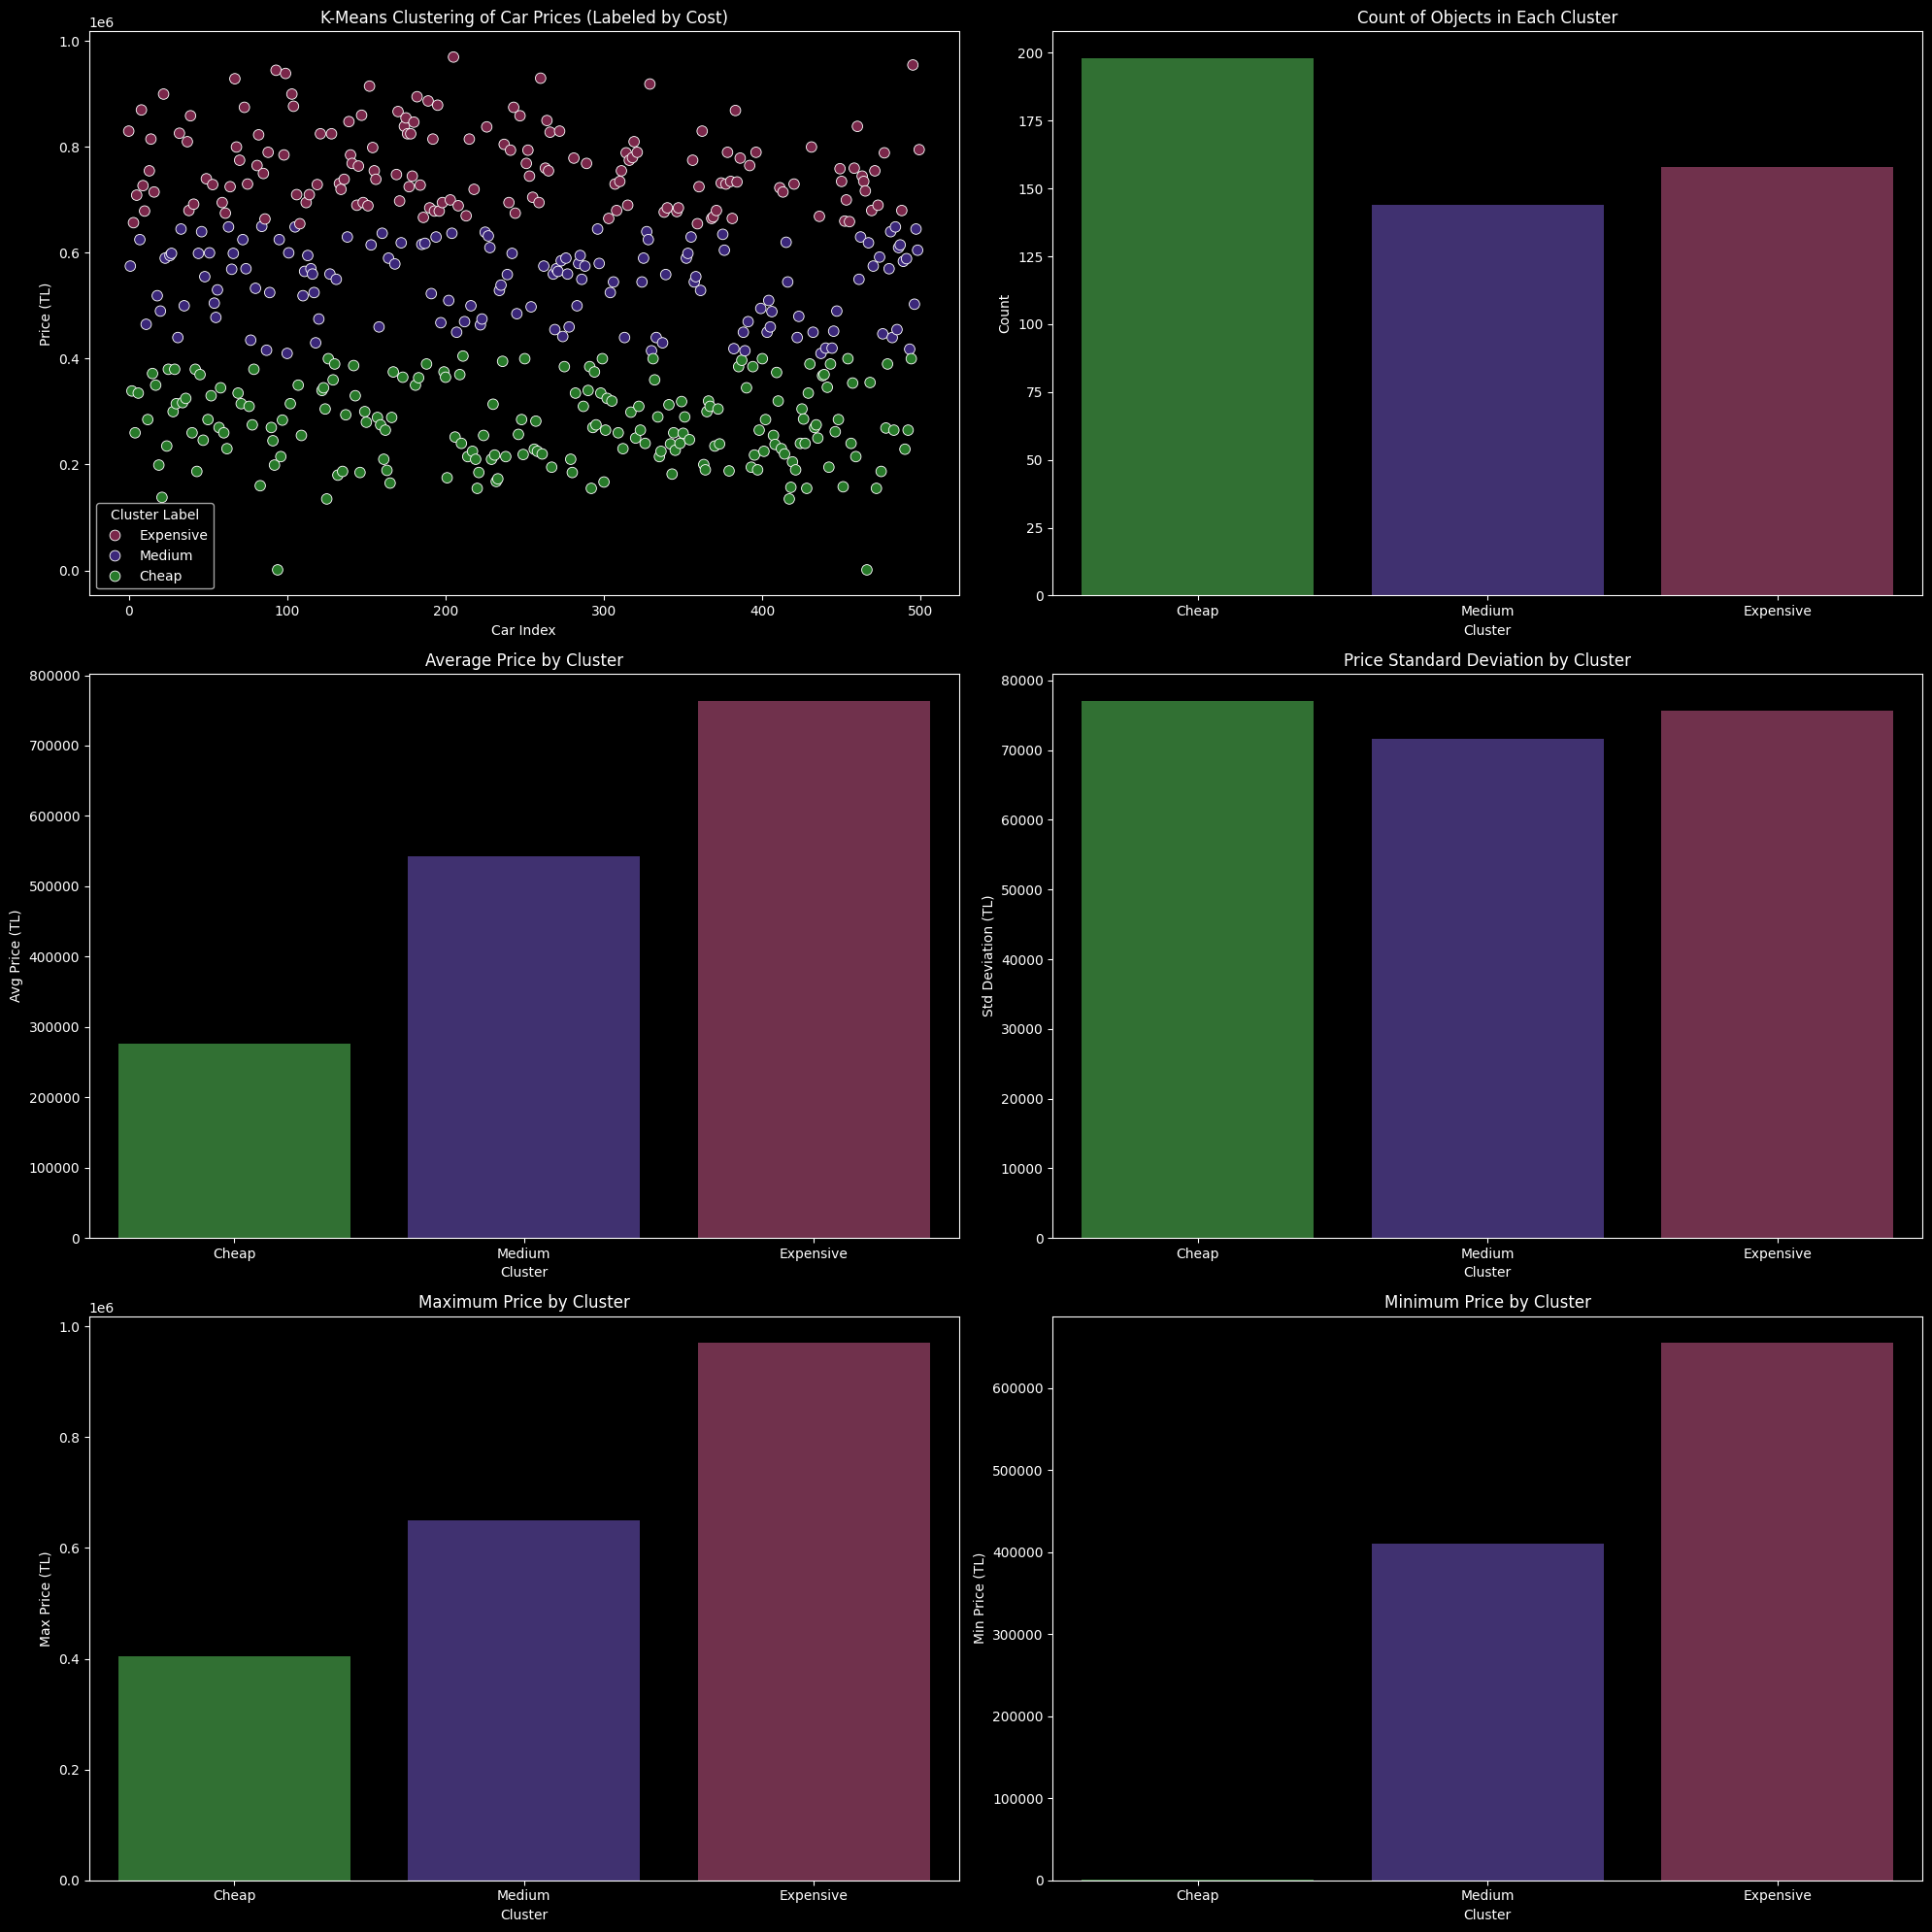

In [ ]:
custom_palette = {"Cheap": "#277A29", "Medium": "#3B277A", "Expensive": "#7A274A"}
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
x_axis_labels = ['Cheap', 'Medium', 'Expensive']

# Fiyatların Dağılım Grafiği ve Küme Etiketleri özel palet kullanılarak
sns.scatterplot(
    x=range(len(data)),
    y="Price (TL)",
    hue="Cluster Label",
    data=data,
    palette=custom_palette,
    s=60,
    ax=axes[0, 0],
    legend=True
)
axes[0, 0].set_title("K-Means Clustering of Car Prices (Labeled by Cost)")
axes[0, 0].set_xlabel("Car Index")
axes[0, 0].set_ylabel("Price (TL)")

# Her kümedeki nesnelerin sayısını gösteren grafik
sns.barplot(x=x_axis_labels, y=data.groupby('Cluster').size(),
            ax=axes[0, 1], hue=x_axis_labels, palette=custom_palette, legend=False)
axes[0, 1].set_title('Count of Objects in Each Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Count')

# Ortalama değerleri gösteren grafik
sns.barplot(x=x_axis_labels, y=cluster_stats['mean'], ax=axes[1, 0],
            hue=x_axis_labels, palette=custom_palette, legend=False)
axes[1, 0].set_title('Average Price by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Avg Price (TL)')

# Standart Sapma değerlerini gösteren grafik
sns.barplot(x=x_axis_labels, y=cluster_stats['std'], ax=axes[1, 1],
            hue=x_axis_labels, palette=custom_palette, legend=False)
axes[1, 1].set_title('Price Standard Deviation by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Std Deviation (TL)')

# Maksimum değerleri gösteren grafik
sns.barplot(x=x_axis_labels, y=cluster_stats['max'], ax=axes[2, 0],
            hue=x_axis_labels, palette=custom_palette, legend=False)
axes[2, 0].set_title('Maximum Price by Cluster')
axes[2, 0].set_xlabel('Cluster')
axes[2, 0].set_ylabel('Max Price (TL)')

# Minimum değerleri gösteren grafik
sns.barplot(x=x_axis_labels, y=cluster_stats['min'], ax=axes[2, 1],
            hue=x_axis_labels, palette=custom_palette, legend=False)
axes[2, 1].set_title('Minimum Price by Cluster')
axes[2, 1].set_xlabel('Cluster')
axes[2, 1].set_ylabel('Min Price (TL)')

plt.tight_layout()
plt.show()